In [ ]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading all the datasets
data_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'], dayfirst=True)
state_df = pd.read_csv('State_data.csv')
ncap_funding_df = pd.read_csv('NCAP_Funding.csv')

# **Spatial Aggregation**

In [ ]:
# Question 1: Which state has the highest average PM2.5 concentration?

# Cleaning and preparing the data
data_clean = data_df.copy()
data_clean['PM2.5'] = pd.to_numeric(data_clean['PM2.5'], errors='coerce')
data_clean = data_clean.dropna(subset=['PM2.5', 'state'])

# Calculating average PM2.5 per state and sort
avg_pm25_by_state = data_clean.groupby('state')['PM2.5'].mean().sort_values(ascending=False)

# Identify state with highest average PM2.5
highest_avg_pm25_state = avg_pm25_by_state.index[0]
highest_avg_pm25_value = avg_pm25_by_state.iloc[0]

# Display result
print(f"The state with the highest average PM2.5 concentration is {highest_avg_pm25_state} with an average of {highest_avg_pm25_value:.2f} µg/m³.")


The state with the highest average PM2.5 concentration is Delhi with an average of 105.10 µg/m³.


In [ ]:
# Question 2: Which state had the most days with hazardous PM2.5 levels (above 300 µg/m³) in 2023?

# Converting Timestamp to datetime format
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], errors='coerce')

# Filtering data for the year 2023 and hazardous PM2.5 levels
data_2023 = data_df[(data_df['Timestamp'].dt.year == 2023) & (data_df['PM2.5'] > 300)]

# Counting the number of hazardous days per state
hazardous_days_per_state = data_2023.groupby('state')['Timestamp'].nunique()

# Identifying the state with the most hazardous days
most_hazardous_state = hazardous_days_per_state.idxmax()
most_hazardous_days = hazardous_days_per_state.max()

# Displaying the result
print(f"The state with the most hazardous PM2.5 days in 2023 is {most_hazardous_state} with {most_hazardous_days} days.")

The state with the most hazardous PM2.5 days in 2023 is Bihar with 19 days.


In [ ]:
#Question 3: Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023?

# Calculating the standard deviation (as a measure of variability) for PM2.5 levels in 2023
variability_per_state = data_2023.groupby('state')['PM2.5'].std()

# Identify the state with the highest variability
highest_variability_state = variability_per_state.idxmax()
highest_variability_value = variability_per_state.max()

# Displaying the result
print(f"The state with the highest variability in PM2.5 levels in 2023 is {highest_variability_state} with a standard deviation of {highest_variability_value:.2f}.")

The state with the highest variability in PM2.5 levels in 2023 is Madhya Pradesh with a standard deviation of 339.25.


In [ ]:
#Question 4: Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)

# Filter data for the Covid period (2020-2021)
data_covid = data_df[(data_df['Timestamp'].dt.year >= 2020) & (data_df['Timestamp'].dt.year <= 2021)]

# Calculate the average PM2.5 concentration per state during Covid period
avg_pm25_covid_per_state = data_covid.groupby('state')['PM2.5'].mean().sort_values()

# Identify the state with the lowest average PM2.5
lowest_avg_pm25_state = avg_pm25_covid_per_state.idxmin()
lowest_avg_pm25_value = avg_pm25_covid_per_state.min()

# Display the result
print(f"The state with the lowest average PM2.5 levels during 2020-2021 is {lowest_avg_pm25_state} with an average of {lowest_avg_pm25_value:.2f} µg/m³.")

The state with the lowest average PM2.5 levels during 2020-2021 is Mizoram with an average of 13.66 µg/m³.


# **Temporal Aggregation**

In [ ]:
#Question 1: Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.
data_aug_2020 = data_df[(data_df['Timestamp'].dt.year == 2020) & (data_df['Timestamp'].dt.month == 8)]

# Identify the station with the highest PM2.5 value
max_pm25_station = data_aug_2020.loc[data_aug_2020['PM2.5'].idxmax()]

# Display the result
print(f"The station with the highest PM2.5 in August 2020 is {max_pm25_station['station']} with a PM2.5 level of {max_pm25_station['PM2.5']} µg/m³.")

The station with the highest PM2.5 in August 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with a PM2.5 level of 805.51 µg/m³.


In [ ]:
#Question 2: For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
#[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?

station_name = 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
data_2018 = data_df[(data_df['Timestamp'].dt.year == 2018) & (data_df['station'] == station_name)]

# Define seasons
seasons = {
    'Winter': [12, 1, 2],
    'Summer': [3, 4, 5],
    'Monsoon': [6, 7, 8, 9]
}

# Calculate average PM2.5 for each season
avg_pm25_season = {season: data_2018[data_2018['Timestamp'].dt.month.isin(months)]['PM2.5'].mean() for season, months in seasons.items()}

# Identify the season with the highest pollution
highest_pollution_season = max(avg_pm25_season, key=avg_pm25_season.get)

# Display the results
for season, avg_pm25 in avg_pm25_season.items():
    print(f"Average PM2.5 in {season} 2018: {avg_pm25:.2f} µg/m³")

print(f"The season with the highest pollution in 2018 is {highest_pollution_season}.")

Average PM2.5 in Winter 2018: 67.49 µg/m³
Average PM2.5 in Summer 2018: nan µg/m³
Average PM2.5 in Monsoon 2018: 34.43 µg/m³
The season with the highest pollution in 2018 is Winter.


Here are some potential factors that explain why certain seasons tend to have higher pollution levels than others:

1. Winter (Higher Pollution)

Temperature Inversion: Cold air traps pollutants close to the ground, preventing them from dispersing.

Increased Biomass Burning: Use of wood and coal for heating, along with agricultural stubble burning, adds more particulate matter.

Low Wind Speeds: Reduced wind slows down the dispersion of pollutants.
2. Summer (Moderate Pollution)

Higher Temperatures: Promote vertical mixing of air, which helps disperse pollutants.

Photochemical Reactions: Strong sunlight can increase ozone levels, though PM2.5 levels may be lower compared to winter.

3. Monsoon (Lower Pollution)

Rainfall: Acts as a natural cleanser, washing away airborne pollutants.

High Humidity: Can cause particulate matter to settle more quickly.

4. Autumn/Post-Monsoon (Variable Pollution)

Crop Residue Burning: Common in agricultural regions, especially in northern India, leading to spikes in PM2.5.

Transition Period: Weather conditions fluctuate, sometimes causing temporary stagnation of air.

<ipython-input-36-9f6d8abcde18>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Day_Type'] = np.where(data_2021['Timestamp'].dt.weekday < 5, 'Weekday', 'Weekend')


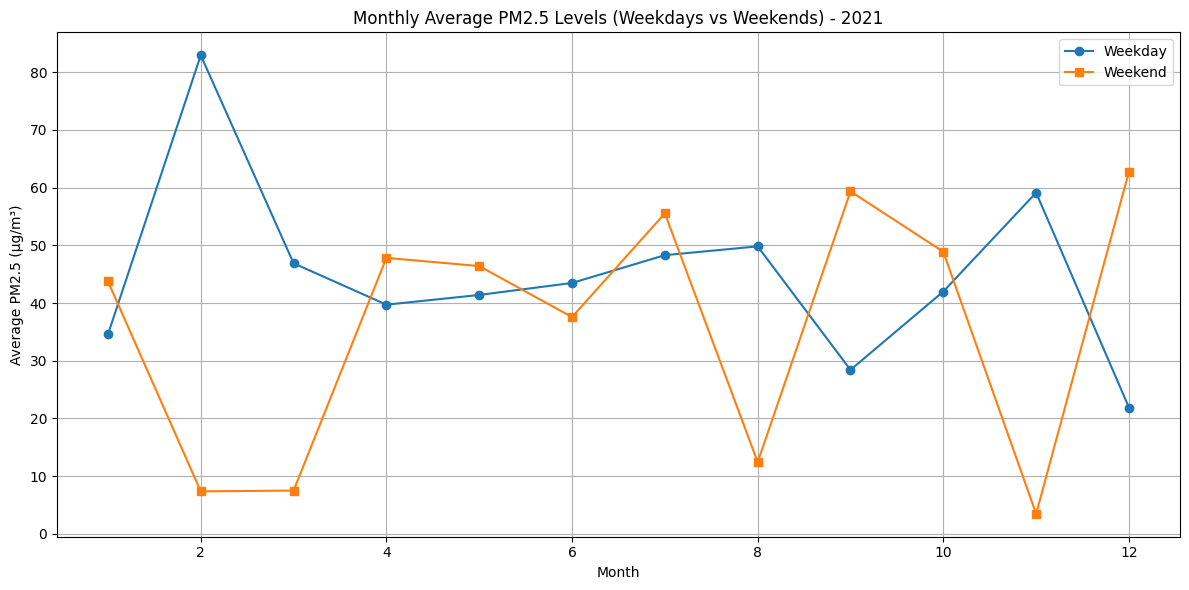

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
station_name = 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'])
# Filter data for 2021 and the specified station
data_2021 = data_df[(data_df['Timestamp'].dt.year == 2021) & (data_df['station'] == station_name)]

# Add a column to distinguish weekends and weekdays
data_2021['Day_Type'] = np.where(data_2021['Timestamp'].dt.weekday < 5, 'Weekday', 'Weekend')

# Calculate monthly average PM2.5 for weekdays and weekends
monthly_avg_pm25 = data_2021.groupby([data_2021['Timestamp'].dt.month, 'Day_Type'])['PM2.5'].mean().unstack()

# Perform median imputation for missing values (months 7, 8, 9)
monthly_avg_pm25.fillna(monthly_avg_pm25.median(), inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25['Weekday'], label='Weekday', marker='o')
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25['Weekend'], label='Weekend', marker='s')

plt.title('Monthly Average PM2.5 Levels (Weekdays vs Weekends) - 2021')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Spatio-temporal Aggregation**

In [ ]:
#Question 1

# Filter data for 2022
data_2022 = data_df[data_df['Timestamp'].dt.year == 2022]

# Define Monsoon (June-Sept) and Summer (March-May) months
monsoon_months = [6, 7, 8, 9]
summer_months = [3, 4, 5]

# Calculate average PM2.5 for each state during Monsoon and Summer
avg_pm25_monsoon = data_2022[data_2022['Timestamp'].dt.month.isin(monsoon_months)].groupby('state')['PM2.5'].mean()
avg_pm25_summer = data_2022[data_2022['Timestamp'].dt.month.isin(summer_months)].groupby('state')['PM2.5'].mean()

# Calculate percentage change
percentage_change = ((avg_pm25_monsoon - avg_pm25_summer) / avg_pm25_summer) * 100

# Identify the state with the most difference
most_difference_state = percentage_change.abs().idxmax()
most_difference_value = percentage_change.loc[most_difference_state]

# Display the result
print(f"The state with the most percentage difference in PM2.5 levels (Monsoon vs Summer) for 2022 is {most_difference_state} with a change of {most_difference_value:.2f}%.")


The state with the most percentage difference in PM2.5 levels (Monsoon vs Summer) for 2022 is Assam with a change of -61.18%.


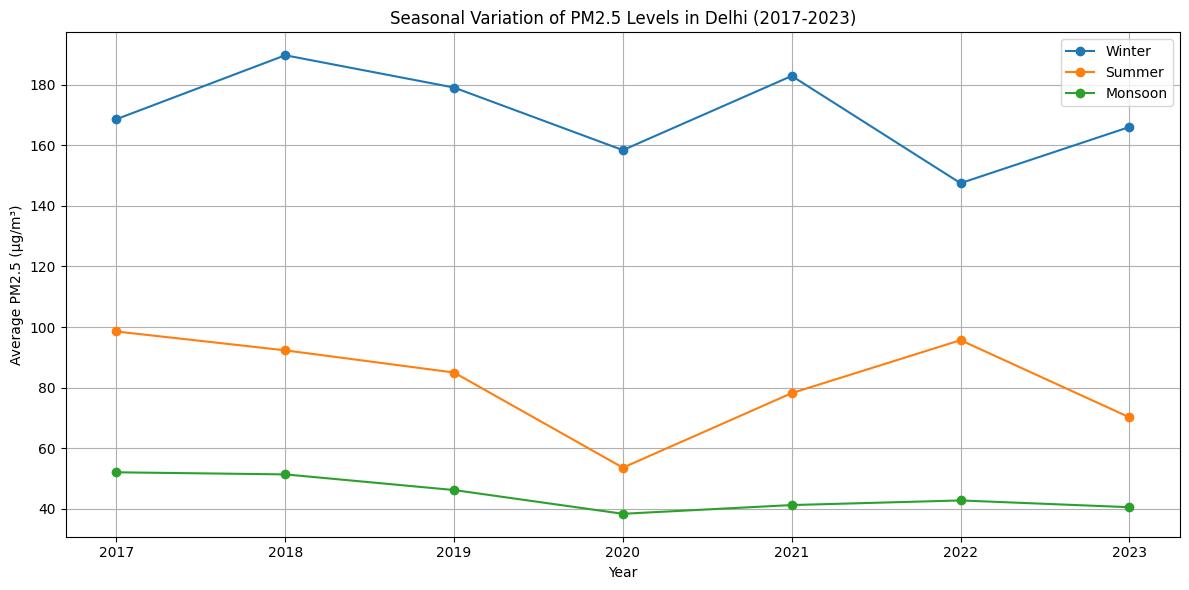

In [ ]:
#Question 2

# Filter data for Delhi
delhi_data = data_df[(data_df['state'] == 'Delhi') & (data_df['Timestamp'].dt.year.between(2017, 2023))]

# Define seasons
seasons = {
    'Winter': [12, 1, 2],
    'Summer': [3, 4, 5],
    'Monsoon': [6, 7, 8, 9]
}

# Calculate average PM2.5 for each season from 2017 to 2023
seasonal_avg_pm25 = {
    season: delhi_data[delhi_data['Timestamp'].dt.month.isin(months)].groupby(delhi_data['Timestamp'].dt.year)['PM2.5'].mean()
    for season, months in seasons.items()
}

plt.figure(figsize=(12, 6))
for season, data in seasonal_avg_pm25.items():
    plt.plot(data.index, data.values, label=season, marker='o')

plt.title('Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

It can be noticed from the graph that the avergage PM2.5 conentration is siginificantly higher in the winter season as compared to monsoon or summer seasons.

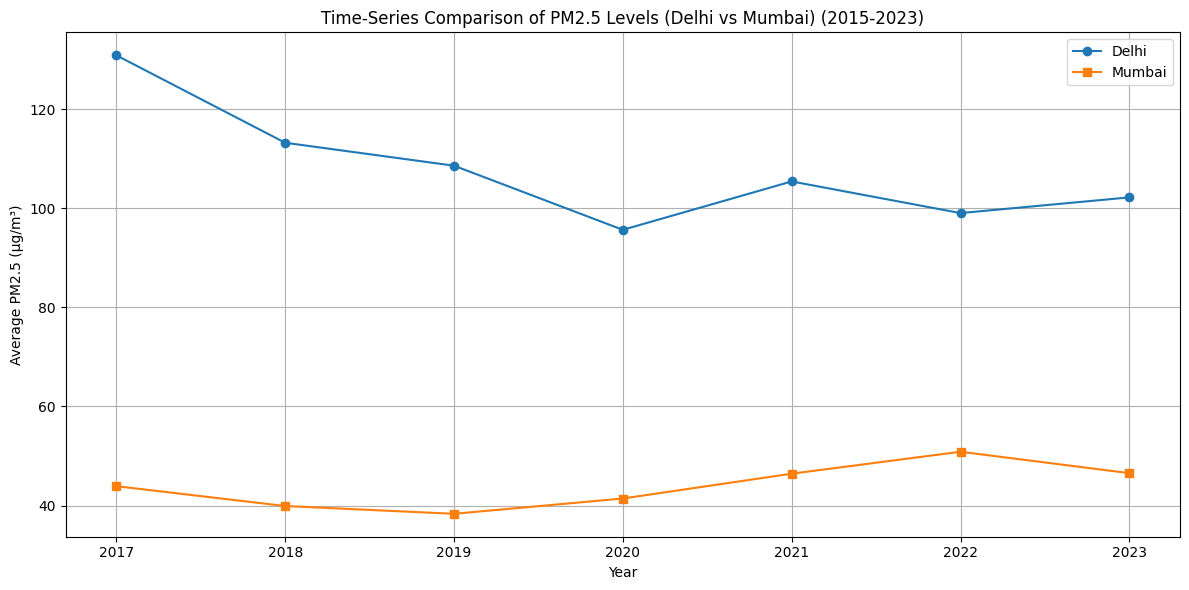

In [ ]:
#Question 3

# Filter data for Delhi and Mumbai
delhi_mumbai_data = data_df[(data_df['state'].isin(['Delhi', 'Maharashtra'])) & (data_df['Timestamp'].dt.year.between(2015, 2023))]

# Group by year and state to calculate average PM2.5
avg_pm25_by_year = delhi_mumbai_data.groupby([delhi_mumbai_data['Timestamp'].dt.year, 'state'])['PM2.5'].mean().unstack()

# Plotting the time-series comparison
plt.figure(figsize=(12, 6))
plt.plot(avg_pm25_by_year.index, avg_pm25_by_year['Delhi'], label='Delhi', marker='o')
plt.plot(avg_pm25_by_year.index, avg_pm25_by_year['Maharashtra'], label='Mumbai', marker='s')

plt.title('Time-Series Comparison of PM2.5 Levels (Delhi vs Mumbai) (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Between the year 2017 and 2023, Delhi had more PM2.5 concentration fluctuations.

## **Population Based**




In [ ]:
#Question 1

# Ensure the Timestamp column is in datetime format
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], errors='coerce')


# Count the number of monitoring stations per state
monitoring_stations_per_state = data_df.groupby('state')['station'].nunique()

# Calculate stations per million people
stations_per_million = monitoring_stations_per_state / (state_df.set_index('State')['Population'] / 1e6)

# Identify the state with the highest stations-to-population ratio
highest_station_ratio_state = stations_per_million.idxmax()
highest_station_ratio_value = stations_per_million.max()

# Display the result
print(f"The state with the highest number of monitoring stations relative to its population is {highest_station_ratio_state} with {highest_station_ratio_value:.2f} stations per million people.")


The state with the highest number of monitoring stations relative to its population is Chandigarh with 2.84 stations per million people.


<ipython-input-23-2269d9691842>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_polluted_states.values, y=top_5_polluted_states.index, palette='Reds_r')


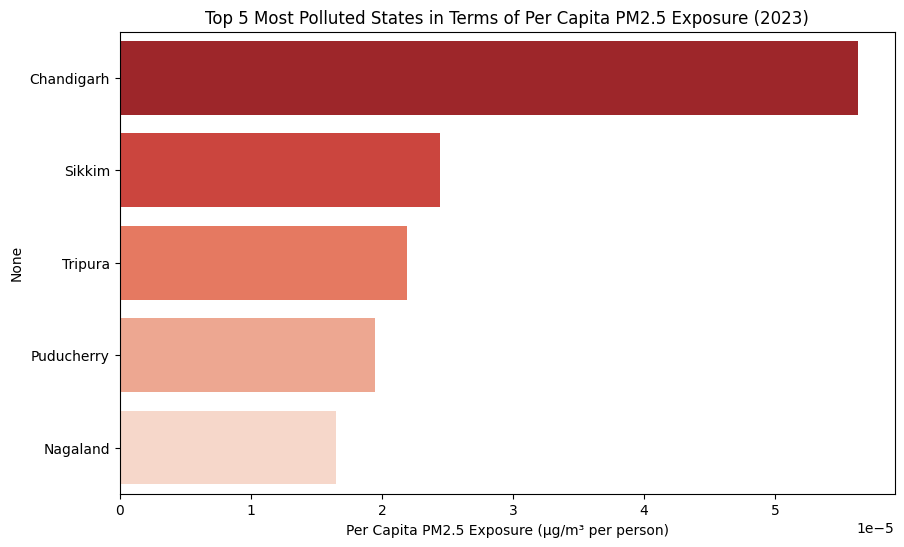

In [ ]:
#Question 2

# Filter data for the year 2023
pm25_2023 = data_df[data_df['Timestamp'].dt.year == 2023]

# Calculate per capita PM2.5 exposure
pm25_per_capita_2023 = pm25_2023.groupby('state')['PM2.5'].mean() / state_df.set_index('State')['Population']

# Get top 5 most polluted states
top_5_polluted_states = pm25_per_capita_2023.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_polluted_states.values, y=top_5_polluted_states.index, palette='Reds_r')
plt.xlabel('Per Capita PM2.5 Exposure (µg/m³ per person)')
plt.title('Top 5 Most Polluted States in Terms of Per Capita PM2.5 Exposure (2023)')
plt.show()

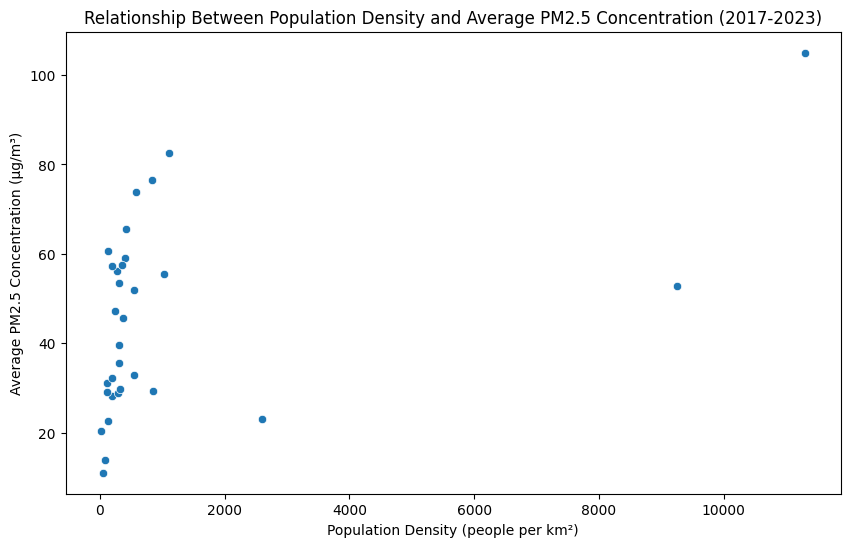

The correlation between population density and average PM2.5 concentration from 2017 to 2023 is 0.46.


In [ ]:
#Question 3

# Calculate average PM2.5 per state (2017-2023)
avg_pm25_per_state = data_df[(data_df['Timestamp'].dt.year.between(2017, 2023))].groupby('state')['PM2.5'].mean().reset_index()

# Merge with population data to calculate population density
merged_data = pd.merge(avg_pm25_per_state, state_df, left_on='state', right_on='State')
merged_data['Population_Density'] = merged_data['Population'] / merged_data['Area (km2)']

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population_Density', y='PM2.5', data=merged_data)
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.title('Relationship Between Population Density and Average PM2.5 Concentration (2017-2023)')
plt.show()

# Correlation
correlation = merged_data['Population_Density'].corr(merged_data['PM2.5'])
print(f"The correlation between population density and average PM2.5 concentration from 2017 to 2023 is {correlation:.2f}.")


# **Area Based**

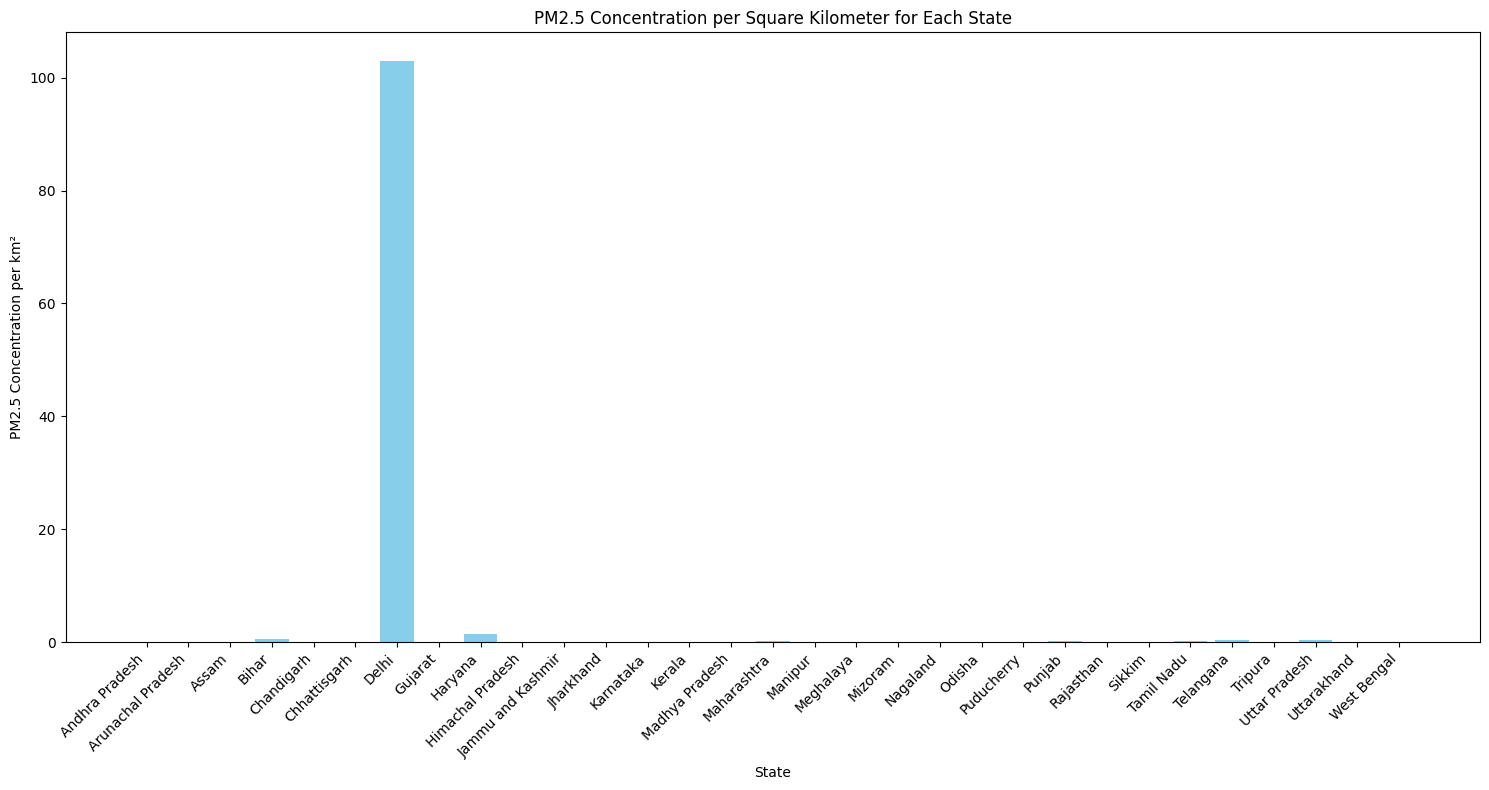


State with the highest PM2.5 concentration per square kilometer: Delhi


In [ ]:
#Question 1
#Calculating total PM2.5 concentration for each state
total_pm25_per_state = data_df.groupby("state")["PM2.5"].sum().reset_index()
total_pm25_per_state.columns = ["State", "Total_PM2.5"]

#Merging with the state area data
merged_data = pd.merge(total_pm25_per_state, state_df, on="State", how="inner")

#Calculate PM2.5 concentration per square kilometer
merged_data["PM2.5_per_km2"] = merged_data["Total_PM2.5"] / merged_data["Area (km2)"]

#Plot the results
plt.figure(figsize=(15, 8))
plt.bar(merged_data["State"], merged_data["PM2.5_per_km2"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("PM2.5 Concentration per km²")
plt.title("PM2.5 Concentration per Square Kilometer for Each State")
plt.tight_layout()
plt.show()

#Identify the state with the highest PM2.5 concentration per km²
state_highest_pm25 = merged_data.loc[merged_data["PM2.5_per_km2"].idxmax(), "State"]
print("\nState with the highest PM2.5 concentration per square kilometer:", state_highest_pm25)

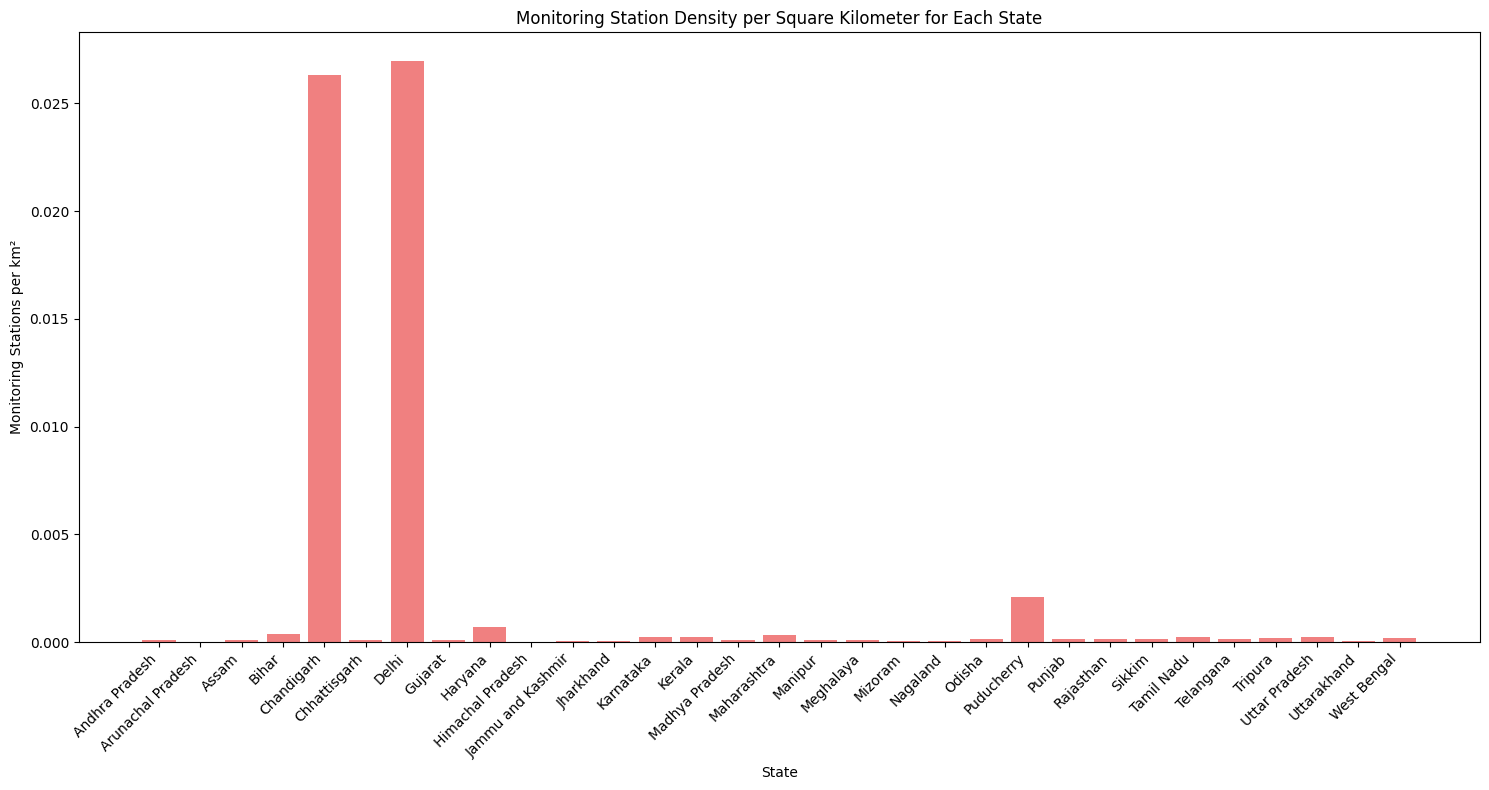


State with the highest density of monitoring stations: Delhi


In [ ]:
# Question 2
# Count the number of monitoring stations per state
stations_per_state = data_df.groupby("state")["station"].nunique().reset_index()
stations_per_state.columns = ["State", "Total_Stations"]

# Merge with the state area data
merged_stations_data = pd.merge(stations_per_state, state_df, on="State", how="inner")

# Calculate the number of monitoring stations per square kilometer
merged_stations_data["Stations_per_km2"] = merged_stations_data["Total_Stations"] / merged_stations_data["Area (km2)"]

# Plot the results
plt.figure(figsize=(15, 8))
plt.bar(merged_stations_data["State"], merged_stations_data["Stations_per_km2"], color="lightcoral")
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Monitoring Stations per km²")
plt.title("Monitoring Station Density per Square Kilometer for Each State")
plt.tight_layout()
plt.show()

# Identify the state with the highest density of monitoring stations
state_highest_density = merged_stations_data.loc[merged_stations_data["Stations_per_km2"].idxmax(), "State"]
print("\nState with the highest density of monitoring stations:", state_highest_density)

In [ ]:
#Question 3
# Convert the Timestamp column to datetime format and handle errors
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce", dayfirst=True)

# Remove rows with NaT in the Timestamp column
data_df = data_df.dropna(subset=["Timestamp"])

# Filter data for the year 2021 and relevant states
data_2021 = data_df[(data_df["Timestamp"].dt.year == 2021) &
                    (data_df["state"].isin(["Maharashtra", "Madhya Pradesh"]))]

# Calculate the average PM2.5 for Maharashtra and Madhya Pradesh
avg_pm25_per_state = data_2021.groupby("state")["PM2.5"].mean().reset_index()
avg_pm25_per_state.columns = ["State", "Average_PM2.5"]

# Calculate population density for Maharashtra and Madhya Pradesh
state_density = state_df[state_df["State"].isin(["Maharashtra", "Madhya Pradesh"])].copy()
state_density["Population_Density"] = state_density["Population"] / state_density["Area (km2)"]

# Merge average PM2.5 with population density
comparison_data = pd.merge(avg_pm25_per_state, state_density, on="State")

# Print the comparison
print("Comparison of Average PM2.5 and Population Density:\n")
display(comparison_data)


Comparison of Average PM2.5 and Population Density:



,State,Average_PM2.5,Population,Area (km2),Population_Density
0,Madhya Pradesh,49.201539,72626809,308252,235.608557
1,Maharashtra,47.334309,112374333,307713,365.192023


# **Funding Based**

In [ ]:
# Question 1

# Convert Timestamp to datetime and filter for 2021
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce", dayfirst=True)
data_df = data_df.dropna(subset=["Timestamp"])
data_2021 = data_df[data_df["Timestamp"].dt.year == 2021]

# Create a list of states that received NCAP funding
funded_states = ncap_funding_df["State"].unique()

# Add a new column to indicate whether a state received NCAP funding
data_2021["NCAP_Funded"] = data_2021["state"].apply(lambda x: "Funded" if x in funded_states else "Not Funded")

# Calculate the average PM2.5 for funded and non-funded states
avg_pm25_comparison = data_2021.groupby("NCAP_Funded")["PM2.5"].mean().reset_index()
avg_pm25_comparison.columns = ["NCAP_Funded", "Average_PM2.5"]

# Print the results
print("Average PM2.5 Levels in 2021 for Funded vs. Non-Funded States:")
display(avg_pm25_comparison)

Average PM2.5 Levels in 2021 for Funded vs. Non-Funded States:


<ipython-input-17-07b47179df64>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021["NCAP_Funded"] = data_2021["state"].apply(lambda x: "Funded" if x in funded_states else "Not Funded")


,NCAP_Funded,Average_PM2.5
0,Funded,61.939703
1,Not Funded,59.752050


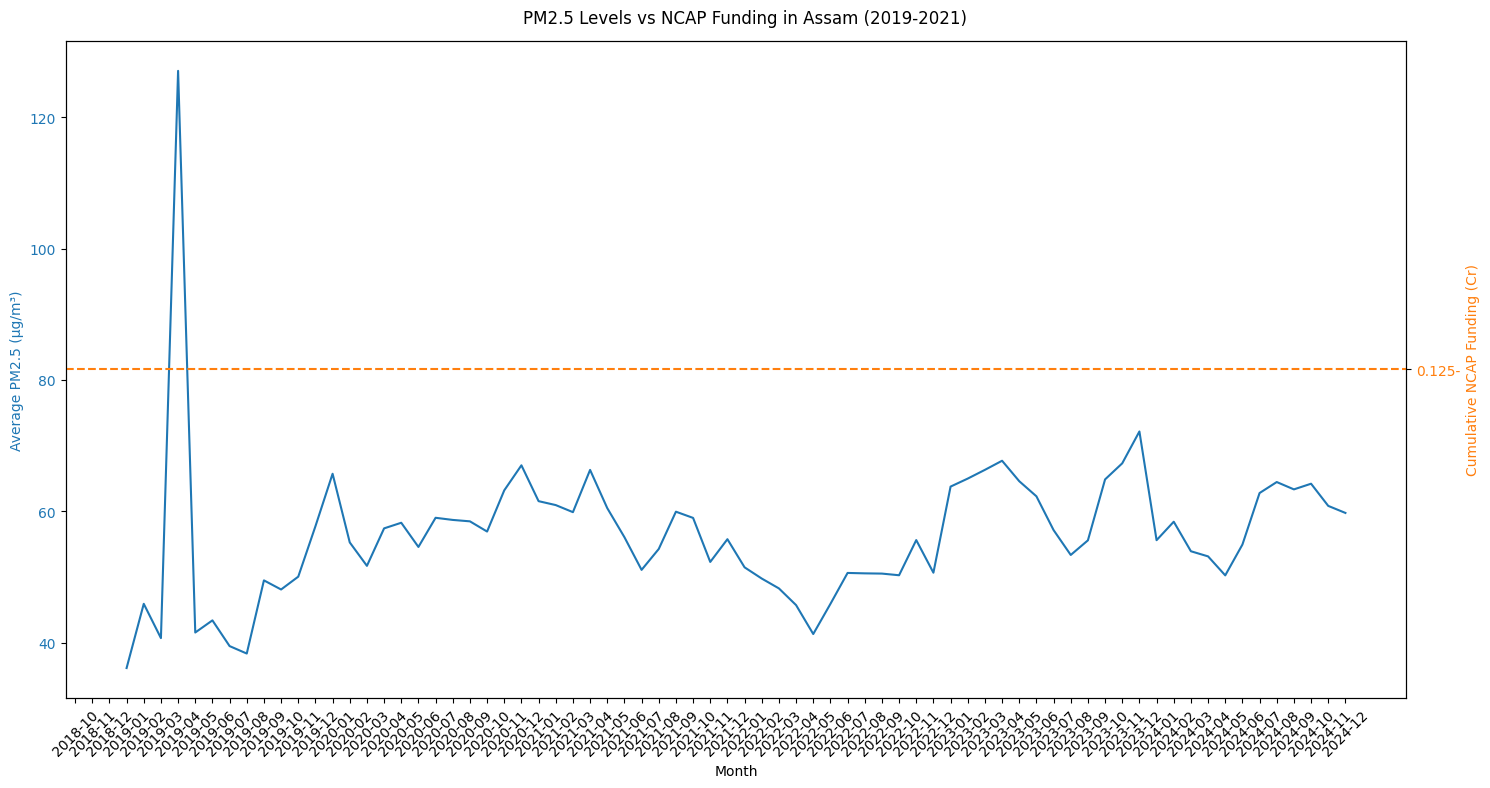

In [ ]:
# Question 2

# Convert Timestamp to datetime and filter data for Assam
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce", dayfirst=True)
data_df = data_df.dropna(subset=["Timestamp"])
assam_data = data_df[data_df["state"] == "Assam"].copy()

# Group by month and calculate average PM2.5
assam_data["Month"] = assam_data["Timestamp"].dt.to_period("M").astype(str)
monthly_pm25 = assam_data.groupby("Month")["PM2.5"].mean().reset_index()

# Extract NCAP funding data for Assam and calculate cumulative funding
assam_funding = ncap_funding_df[ncap_funding_df["State"] == "Assam"]
cumulative_funding = assam_funding[
    ["Amount released during FY 2019-20", "Amount released during FY 2020-21", "Amount released during FY 2021-22"]
].sum(axis=1).values[0]

# Create a time series plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot PM2.5 levels
ax1.plot(monthly_pm25["Month"], monthly_pm25["PM2.5"], color="tab:blue", label="Average PM2.5 (µg/m³)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Average PM2.5 (µg/m³)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.tick_params(axis="x", rotation=45)

# Plot NCAP cumulative funding as a constant line
ax2 = ax1.twinx()
ax2.axhline(y=cumulative_funding, color="tab:orange", linestyle="--", label="Cumulative NCAP Funding (Cr)")
ax2.set_ylabel("Cumulative NCAP Funding (Cr)", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

# Add a legend and title
fig.suptitle("PM2.5 Levels vs NCAP Funding in Assam (2019-2021)")
fig.tight_layout()
plt.show()

<ipython-input-6-0b7ce362d296>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', num_states)


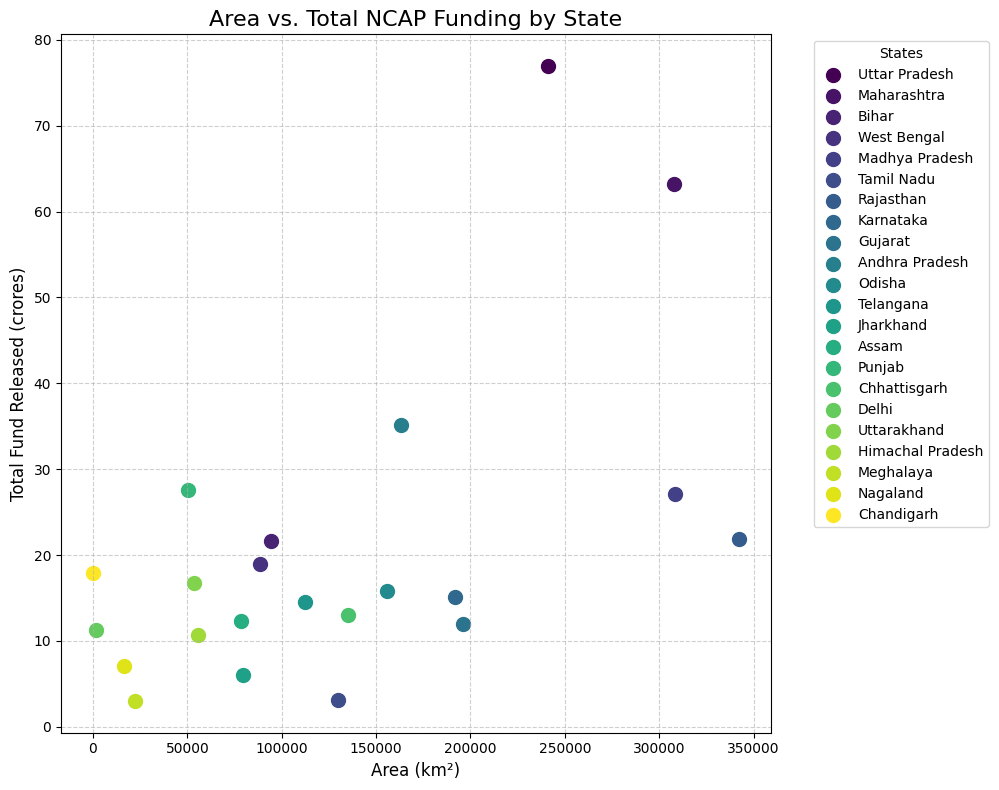

In [ ]:
# Question 3
# Replace '-' with 0 and convert relevant columns to numeric
cols_to_convert = ['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 'Amount released during FY 2021-22']
ncap_funding_df[cols_to_convert] = ncap_funding_df[cols_to_convert].replace('-', 0).apply(pd.to_numeric)

# Calculate the total fund released by summing the funds from each FY
ncap_funding_df['Total Fund Released Calc'] = (
    ncap_funding_df['Amount released during FY 2019-20'] +
    ncap_funding_df['Amount released during FY 2020-21'] +
    ncap_funding_df['Amount released during FY 2021-22']
)

# Group NCAP funding by state and sum the total fund released
state_funding = ncap_funding_df.groupby('State')['Total Fund Released Calc'].sum().reset_index()

# Merge the two dataframes
merged_data = pd.merge(state_df, state_funding, on='State', how='inner')

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Use a colormap to assign a different color to each state
num_states = len(merged_data['State'].unique())
colors = plt.cm.get_cmap('viridis', num_states)

for i, state in enumerate(merged_data['State'].unique()):
    state_data = merged_data[merged_data['State'] == state]
    plt.scatter(state_data['Area (km2)'], state_data['Total Fund Released Calc'],
                color=colors(i), label=state, s=100)

# Set the plot title and labels
plt.title('Area vs. Total NCAP Funding by State', fontsize=16)
plt.xlabel('Area (km²)', fontsize=12)
plt.ylabel('Total Fund Released (crores)', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Place the legend outside the plot area
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()


### **Miscellaneous Questions**

In [ ]:
# Question 1
# Convert 'Timestamp' column to datetime objects, handling errors
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], errors='coerce', dayfirst=True)

# Drop rows where 'Timestamp' is NaT (Not a Time) due to parsing errors
data_df = data_df.dropna(subset=['Timestamp'])

# Filter data for the year 2023
data_2023 = data_df[data_df['Timestamp'].dt.year == 2023]

# Calculate the average PM2.5 level for each city
city_avg_pm25 = data_2023.groupby('city')['PM2.5'].mean()

# Find the most polluted city (highest average PM2.5)
most_polluted_city = city_avg_pm25.idxmax()

# Get PM2.5 data for the most polluted city
city_data = data_2023[data_2023['city'] == most_polluted_city]['PM2.5']

# Count the number of days with PM2.5 above the hazardous threshold (300 µg/m³)
hazardous_days = city_data[city_data > 300].count()

# Calculate the total number of days with PM2.5 data for that city
total_days = city_data.count()

# Calculate the percentage of days above the hazardous threshold
percentage_hazardous = (hazardous_days / total_days) * 100

print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Percentage of days with PM2.5 above 300 µg/m³: {percentage_hazardous:.2f}%")


Most polluted city in 2023: Darbhanga
Percentage of days with PM2.5 above 300 µg/m³: 18.18%


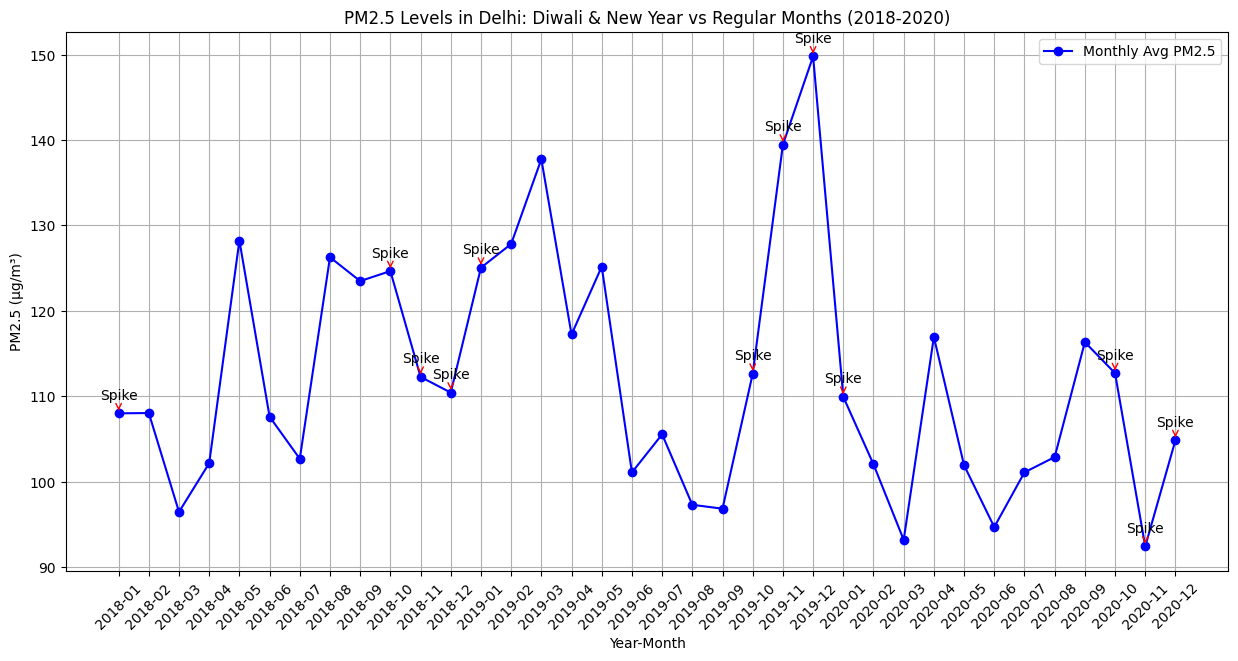

In [ ]:
#Question 2

# Step 2: Filter data for Delhi and years 2018-2020
delhi_data = data_df[(data_df["state"] == "Delhi") & (data_df["Timestamp"].dt.year.isin([2018, 2019, 2020]))].copy()

# Step 3: Extract year and month for grouping
delhi_data["Year-Month"] = delhi_data["Timestamp"].dt.to_period("M").astype(str)

# Step 4: Compute the average PM2.5 for each month
monthly_pm25 = delhi_data.groupby("Year-Month")["PM2.5"].mean().reset_index()

# Step 5: Identify festival months
festival_months = monthly_pm25[monthly_pm25["Year-Month"].str.endswith(("-10", "-11", "-12", "-01"))]  # Oct-Jan

# Step 6: Plot the PM2.5 time series
plt.figure(figsize=(15, 7))
plt.plot(monthly_pm25["Year-Month"], monthly_pm25["PM2.5"], marker="o", linestyle="-", label="Monthly Avg PM2.5", color="blue")

# Step 7: Mark spikes during festival months
for i in range(len(festival_months)):
    plt.annotate("Spike",
                 (festival_months["Year-Month"].iloc[i], festival_months["PM2.5"].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha="center", arrowprops=dict(arrowstyle="->", color="red"))

# Step 8: Customize the plot
plt.xlabel("Year-Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("PM2.5 Levels in Delhi: Diwali & New Year vs Regular Months (2018-2020)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Step 9: Show the plot
plt.show()


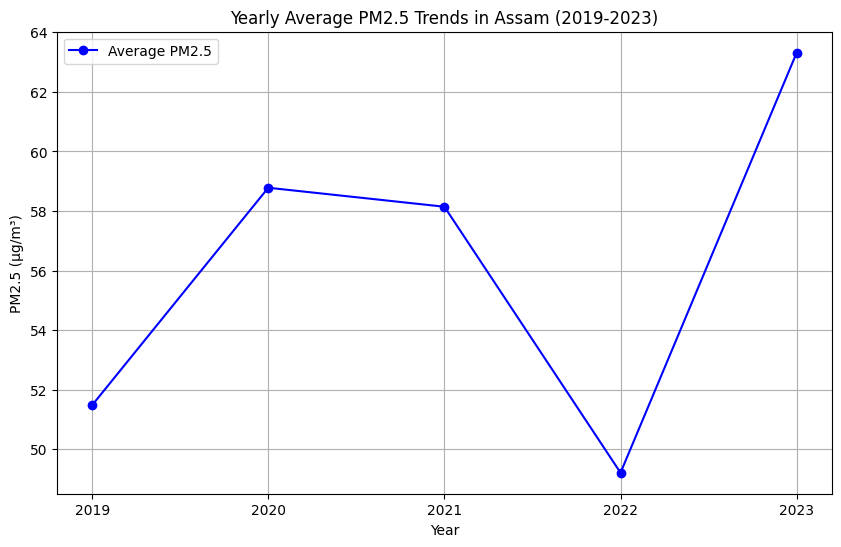

The state with the highest NCAP funding in 2020: Assam


,Year,PM2.5
0,2019,51.479599
1,2020,58.780325
2,2021,58.143054
3,2022,49.212504
4,2023,63.313634


In [ ]:
#Question 3
# Step 1: Identify the state with the highest NCAP funding in 2020
top_funded_state = ncap_funding_df.loc[ncap_funding_df["Amount released during FY 2020-21"].idxmax(), "State"]

# Step 2: Convert Timestamp to datetime and filter air quality data for the top-funded state (2019-2023)
data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce", dayfirst=True)
data_df = data_df.dropna(subset=["Timestamp"])
state_data = data_df[(data_df["state"] == top_funded_state) & (data_df["Timestamp"].dt.year.isin([2019, 2020, 2021, 2022, 2023]))].copy()

# Step 3: Compute yearly average PM2.5 levels
state_data["Year"] = state_data["Timestamp"].dt.year
yearly_pm25 = state_data.groupby("Year")["PM2.5"].mean().reset_index()

# Step 4: Plot a line graph to compare yearly average PM2.5 trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_pm25["Year"], yearly_pm25["PM2.5"], marker="o", linestyle="-", color="blue", label="Average PM2.5")

# Step 5: Customize the plot
plt.xlabel("Year")
plt.ylabel("PM2.5 (µg/m³)")
plt.title(f"Yearly Average PM2.5 Trends in {top_funded_state} (2019-2023)")
plt.xticks(yearly_pm25["Year"])
plt.grid(True)
plt.legend()
plt.show()

# Step 6: Display the top-funded state and its PM2.5 trends
print(f"The state with the highest NCAP funding in 2020: {top_funded_state}")
display(yearly_pm25)

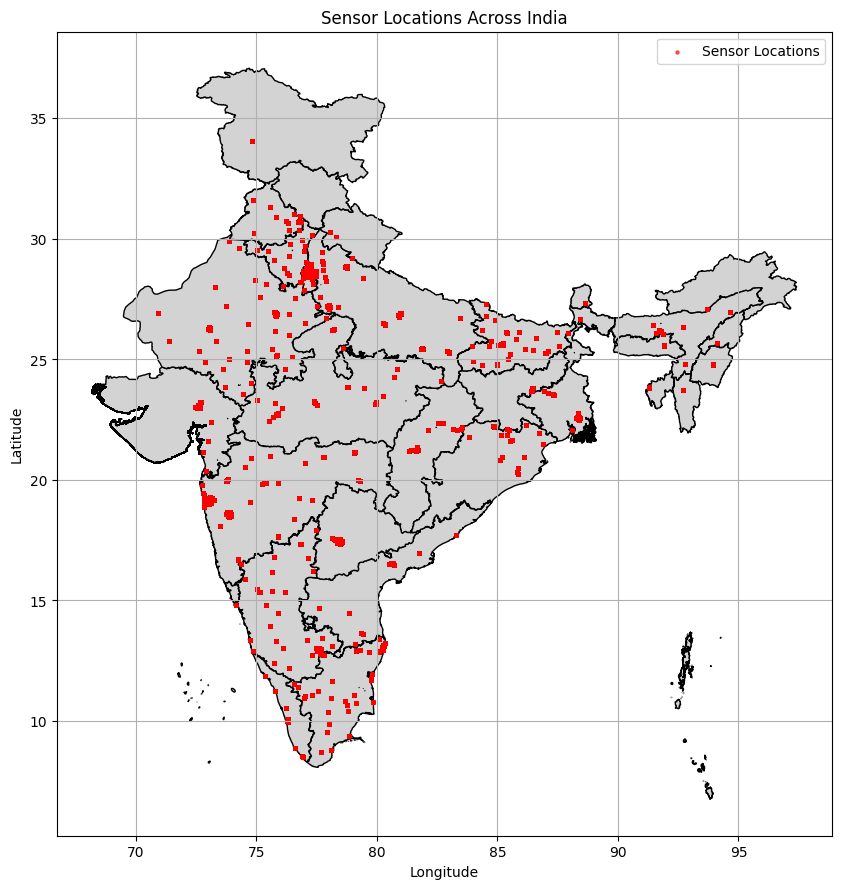

In [ ]:
# Question 4
import geopandas as gpd

# Step 1: Load the India shapefile (directly from Colab's working directory)
india_shapefile_path = "India-States.shp"  # Ensure the filename matches exactly
india_map = gpd.read_file(india_shapefile_path)

# Step 2: Load sensor data and filter valid coordinates
sensor_data = data_df.dropna(subset=["latitude", "longitude"])  # Remove missing values
sensor_gdf = gpd.GeoDataFrame(sensor_data, geometry=gpd.points_from_xy(sensor_data["longitude"], sensor_data["latitude"]))

# Step 3: Plot the India map and sensor locations
fig, ax = plt.subplots(figsize=(10, 12))
india_map.plot(ax=ax, color="lightgray", edgecolor="black")  # Draw India map
sensor_gdf.plot(ax=ax, markersize=5, color="red", alpha=0.6, label="Sensor Locations")  # Plot sensors

# Step 4: Customize the plot
plt.title("Sensor Locations Across India")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

# Show the map
plt.show()


# **Something New!**

**Is pollution data in urban areas accurately represented?**

Average sensors per million people (Urban/Rural):
area_type
Rural    0.896541
Urban    0.404485
Name: sensors_per_million, dtype: float64


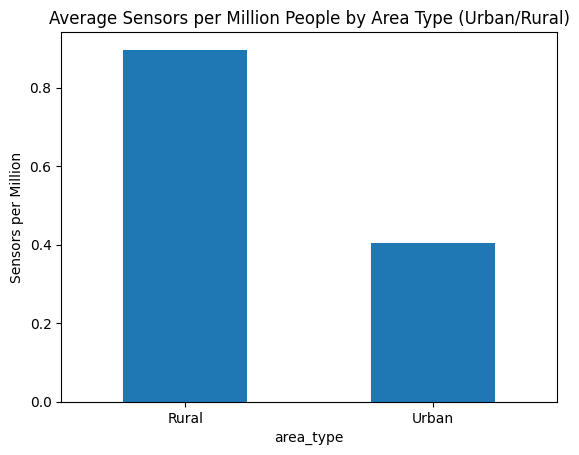

In [24]:
# Loading the datasets
data_df = pd.read_csv('Data.csv')
state_df = pd.read_csv('State_data.csv')
ncap_funding_df = pd.read_csv('NCAP_Funding.csv')

# 1. Calculate the number of sensors per state
sensors_per_state = data_df.groupby('state')['station'].nunique()

# 2. Merge with state population data
state_data = pd.merge(state_df, sensors_per_state, left_on='State', right_on='state', how='left')
state_data = state_data.rename(columns={'station': 'num_sensors'})

# 3. Fill NaN values in 'num_sensors' with 0 (in case a state has no sensors in data_df)
state_data['num_sensors'] = state_data['num_sensors'].fillna(0)

# 4. Calculate sensors per million people
state_data['sensors_per_million'] = (state_data['num_sensors'] / (state_data['Population'] / 1000000))

# 5.  Crude Urban/Rural Approximation
median_population = state_data['Population'].median()
state_data['area_type'] = ['Urban' if pop > median_population else 'Rural' for pop in state_data['Population']]

# 6. Group by Urban/Rural and calculate average sensors per million
grouped_data = state_data.groupby('area_type')['sensors_per_million'].mean()

# Print the results
print("Average sensors per million people (Urban/Rural):")
print(grouped_data)

# Optionally, create a bar plot
grouped_data.plot(kind='bar', rot=0)
plt.title('Average Sensors per Million People by Area Type (Urban/Rural)')
plt.ylabel('Sensors per Million')
plt.show()

**Rural areas show a higher average density of pollution sensors per million people (approximately 0.90) compared to urban areas (approximately 0.40). This suggests a potential imbalance in pollution monitoring, where rural regions may be over-represented and urban regions under-represented in the data. More information regarding city level data will help refine the results. Maybe installing more sensors in urban areas might bring about drastic change in the interpreted data.**